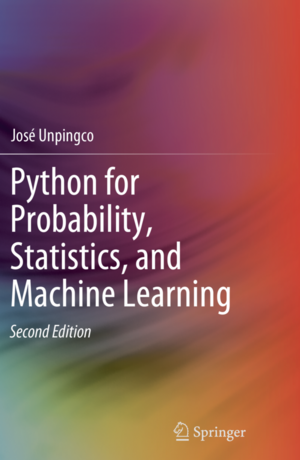

In [1]:
from IPython.display import Image
Image('../../Python_probability_statistics_machine_learning_2E.png',width=200)

So far, we have considered parametric methods that reduce inference
or
prediction to parameter-fitting. However, for these to work, we had to
assume a
specific functional form for the unknown probability distribution of
the data.
Nonparametric methods eliminate the need to assume a specific
functional form by
generalizing to classes of functions.

## Kernel Density Estimation

We have
already made heavy use of this method with the histogram, which is a
special
case of kernel density estimation.  The histogram can be considered the
crudest
and most useful nonparametric method, that estimates the underlying
probability
distribution of the data.

To be formal and place the histogram on the same
footing as our earlier
estimations, suppose that $\mathscr{X}=[0,1]^d$ is the
$d$ dimensional unit
cube and that $h$ is the *bandwidth* or size of a *bin* or
sub-cube. Then,
there are $N\approx(1/h)^d$ such bins, each with volume $h^d$,
$\lbrace
B_1,B_2,\ldots,B_N \rbrace$. With all this in place, we can write the
histogram
has a probability density estimator of the form,

$$
\hat{p}_h(x) = \sum_{k=1}^N \frac{\hat{\theta}_k}{h} I(x\in B_k)
$$

 where

$$
\hat{\theta}_k=\frac{1}{n} \sum_{j=1}^n I(X_j\in B_k)
$$

 is the fraction of data points ($X_k$) in each bin, $B_k$. We want to
bound the
bias and variance of $\hat{p}_h(x)$. Keep in mind that we are trying
to estimate
a function of $x$, but the set of all possible probability
distribution
functions is extremely large and hard to manage. Thus, we need
to restrict our
attention to the following class of probability distribution of
so-called
Lipschitz functions,

$$
\mathscr{P}(L) = \lbrace p\colon \vert p(x)-p(y)\vert \le L \Vert x-y\Vert,
\forall \: x,y \rbrace
$$

 Roughly speaking, these are the density
functions whose slopes (i.e., growth
rates)  are bounded by $L$.
It turns out that the bias of the histogram
estimator is bounded in the
following way,

$$
\int\vert p(x)-\mathbb{E}(\hat{p}_h(x))\vert dx \le L h\sqrt{d}
$$

  Similarly, the variance is bounded by the following,

$$
\mathbb{V}(\hat{p}_h(x)) \le \frac{C}{n h^d}
$$

 for some constant $C$. Putting these two facts together means that the
risk is
bounded by,

$$
R(p,\hat{p}) = \int \mathbb{E}(p(x) -\hat{p}_h(x))^2 dx \le L^2 h^2 d +
\frac{C}{n h^d}
$$

 This upper bound is minimized by choosing

$$
h = \left(\frac{C}{L^2 n d}\right)^\frac{1}{d+2}
$$

 In particular, this means that,

$$
\sup_{p\in\mathscr{P}(L)} R(p,\hat{p}) \le C_0
\left(\frac{1}{n}\right)^{\frac{2}{d+2}}
$$

 where the constant $C_0$ is a function of $L$. There is a theorem
[[wasserman2004all]](#wasserman2004all) that shows this bound in tight, which
basically means
that the histogram is a really powerful probability density
estimator for
Lipschitz functions with risk that goes as
$\left(\frac{1}{n}\right)^{\frac{2}{d+2}}$.  Note that this class of functions
is not necessarily smooth because the Lipschitz condition admits 
non-smooth
functions. While this is a reassuring result, we typically do
not know which
function class (Lipschitz or not) a particular probability
belongs to ahead of
time.  Nonetheless, the rate at which the risk changes with
both dimension $d$
and $n$ samples would be hard to understand without this
result.
[Figure](#fig:nonparametric_001) shows the probability distribution
function of
the $\beta(2,2)$ distribution compared to computed histograms for
different
values of $n$. The box plots on each of the points show how the
variation in
each bin of the histogram reduces with increasing $n$. The risk
function
$R(p,\hat{p})$ above is based upon integrating the squared difference
between
the histogram (as a piecewise function of $x$) and the probability
distribution
function. 

**Programming Tip.**

The following snippet is the main element of
the code for [Figure](#fig:nonparametric_001).

In [2]:
def generate_samples(n,ntrials=500):
    phat = np.zeros((nbins,ntrials))
    for k in range(ntrials):
        d = rv.rvs(n)       
        phat[:,k],_=histogram(d,bins,density=True)   
    return phat

The code uses the `histogram` function from Numpy.
To be consistent with the
risk function $R(p,\hat{p})$, we have to make sure
the `bins` keyword argument
is formatted correctly using a sequence of
bin-edges instead of just a single
integer. Also, the `density=True` keyword
argument normalizes the histogram
appropriately so that the comparison between
it and the probability distribution
function of the simulated beta distribution
is correctly scaled.

<!--
dom:FIGURE: [fig-statistics/nonparametric_001.png, width=800 frac=0.95]  The box
plots on each of the points show how the variation in each bin of the histogram
reduces with increasing $n$. <div id="fig:nonparametric_001"></div> -->
<!--
begin figure -->
<div id="fig:nonparametric_001"></div>

<p>The box plots on
each of the points show how the variation in each bin of the histogram reduces
with increasing $n$.</p>
<img src="fig-statistics/nonparametric_001.png"
width=800>

<!-- end figure -->


## Kernel Smoothing

We can extend our methods
to other function classes using kernel functions.
A one-dimensional smoothing
kernel is a smooth function $K$ with 
the following properties,

$$
\begin{align*}
\int K(x) dx &= 1 \\\
\int x K(x) dx &= 0 \\\
0< \int x^2 K(x)
dx &< \infty \\\
\end{align*}
$$

 For example, $K(x)=I(x)/2$ is the boxcar kernel, where $I(x)=1$
when $\vert
x\vert\le 1$ and zero otherwise. The kernel density estimator is
very similar to
the histogram, except now we put a kernel function on every
point as in the
following,

$$
\hat{p}(x)=\frac{1}{n}\sum_{i=1}^n \frac{1}{h^d} K\left(\frac{\Vert
x-X_i\Vert}{h}\right)
$$

 where $X\in \mathbb{R}^d$. [Figure](#fig:nonparametric_002) shows an
example of
a kernel density estimate using a Gaussian kernel function,
$K(x)=e^{-x^2/2}/\sqrt{2\pi}$. There are  five data points shown by the
vertical
lines in the upper panel. The dotted lines show the individual $K(x)$
function
at each of the data points. The lower panel shows the overall kernel
density
estimate, which is the scaled sum of the upper panel.

There is an important
technical result in [[wasserman2004all]](#wasserman2004all) that
states that
kernel density estimators are minimax in the sense we
discussed in the maximum
likelihood the section [ch:stats:sec:mle](#ch:stats:sec:mle). In
broad strokes,
this means that the analogous risk for the kernel
density estimator is
approximately bounded by the following factor,

$$
R(p,\hat{p}) \lesssim n^{-\frac{2 m}{2 m+d}}
$$

 for some constant $C$ where $m$ is a factor related to bounding
the derivatives
of the probability density function. For example, if the second
derivative of
the density function is bounded, then $m=2$. This means that
the convergence
rate for this estimator decreases with increasing dimension
$d$.

<!--
dom:FIGURE: [fig-statistics/nonparametric_002.png, width=800 frac=0.95]  The
upper panel shows the individual kernel functions placed at each of the data
points. The lower panel shows the composite kernel density estimate which is the
sum of the individual functions in the upper panel. <div
id="fig:nonparametric_002"></div> -->
<!-- begin figure -->
<div
id="fig:nonparametric_002"></div>

<p>The upper panel shows the individual
kernel functions placed at each of the data points. The lower panel shows the
composite kernel density estimate which is the sum of the individual functions
in the upper panel.</p>
<img src="fig-statistics/nonparametric_002.png"
width=800>

<!-- end figure -->


### Cross-Validation

As a practical matter,
the tricky part of the kernel density estimator (which
includes the histogram as
a special case) is that we need to somehow compute
the bandwidth $h$ term using
data. There are several rule-of-thumb methods that
for some common kernels,
including Silverman's rule and Scott's rule for
Gaussian kernels. For example,
Scott's factor is to simply compute $h=n^{
-1/(d+4) }$ and Silverman's is $h=(n
(d+2)/4)^{ (-1/(d+4)) }$. Rules of
this kind are derived by assuming the
underlying probability density
function is of a certain family (e.g., Gaussian),
and then deriving the
best $h$ for a certain type of kernel density estimator,
usually equipped
with extra functional properties (say, continuous derivatives
of a
certain order). In practice, these rules seem to work pretty well,
especially for uni-modal probability density functions.  Avoiding these
kinds of
assumptions means computing the bandwidth from data directly and that is where
cross validation comes in.

Cross-validation is a method to estimate the
bandwidth from the data itself.
The idea is to write out the following
Integrated Squared Error (ISE),

$$
\begin{align*}
\textnormal{ISE}(\hat{p}_h,p)&=\int (p(x)-\hat{p}_h(x))^2
dx\\\
                             &= \int \hat{p}_h(x)^2 dx - 2\int p(x)
\hat{p}_h dx + \int p(x)^2 dx 
\end{align*}
$$

 The problem with this expression is the middle term [^last_term],
[^last_term]: The last term is of no interest because we are
only interested in
relative changes in the ISE.

$$
\int p(x)\hat{p}_h dx
$$

 where $p(x)$ is what we are trying to estimate with $\hat{p}_h$. The
form of
the last expression looks like an expectation of $\hat{p}_h$ over the
density of
$p(x)$, $\mathbb{E}(\hat{p}_h)$. The approach is to
approximate this with the
mean,

$$
\mathbb{E}(\hat{p}_h) \approx \frac{1}{n}\sum_{i=1}^n \hat{p}_h(X_i)
$$

 The problem with this approach is that $\hat{p}_h$ is computed using
the same
data that the approximation utilizes.  The way to get around this is
to split
the data into two equally sized chunks $D_1$, $D_2$; and then compute
$\hat{p}_h$ for a sequence of different $h$ values over the $D_1$ set. Then,
when we apply the above approximation for the data ($Z_i$) in the $D_2$ set,

$$
\mathbb{E}(\hat{p}_h) \approx \frac{1}{\vert D_2\vert}\sum_{Z_i\in D_2}
\hat{p}_h(Z_i)
$$

  Plugging this approximation back into the integrated squared error
provides
the objective function,

$$
\texttt{ISE}\approx \int \hat{p}_h(x)^2 dx-\frac{2}{\vert
D_2\vert}\sum_{Z_i\in D_2} \hat{p}_h(Z_i)
$$

 Some code will make these steps concrete. We will need some tools from
Scikit-
learn.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors.kde import KernelDensity

The `train_test_split` function makes it easy to split and
keep track of the
$D_1$ and $D_2$ sets we need for cross validation. Scikit-learn
already has a
powerful and flexible implementation of kernel density estimators.
To compute
the objective function, we need some
basic numerical integration tools from
Scipy. For this example, we
will generate samples from a $\beta(2,2)$
distribution, which is
implemented in the `stats` submodule in Scipy.

In [4]:
import numpy as np
np.random.seed(123456)

In [5]:
from scipy.integrate import quad
from scipy import stats
rv= stats.beta(2,2)
n=100                 # number of samples to generate
d = rv.rvs(n)[:,None] # generate samples as column-vector

**Programming Tip.**

The use of the `[:,None]` in the last line formats the
Numpy array returned by
the `rvs` function into a Numpy vector with a column
dimension of one. This is
required by the `KernelDensity` constructor because
the column dimension is
used for different features (in general) for Scikit-
learn. Thus, even though we
only have one feature, we still need to comply with
the structured input that
Scikit-learn relies upon. There are many ways to
inject the additional
dimension other than using `None`. For example, the more
cryptic, `np.c_`, or
the less cryptic `[:,np.newaxis]` can do the same, as can
the `np.reshape`
function.



 The next step is to split the data into two
halves and loop over
each of the $h_i$ bandwidths to create a separate kernel
density estimator
based on the $D_1$ data,

In [6]:
train,test,_,_=train_test_split(d,d,test_size=0.5)
kdes=[KernelDensity(bandwidth=i).fit(train) 
        for i in [.05,0.1,0.2,0.3]]

**Programming Tip.**

Note that the single underscore symbol in Python refers to
the last evaluated
result.  the above code unpacks the tuple returned by
`train_test_split` into
four elements.  Because we are only interested in the
first two, we assign the
last two to the underscore symbol. This is a stylistic
usage to make it clear
to the reader that the last two elements of the tuple are
unused.
Alternatively, we could assign the last two elements to a pair of dummy
variables that we do not use later, but then  the reader skimming the code may
think that those dummy variables are relevant.



 The last step is to loop over
the so-created kernel density estimators
and compute the objective function.

In [7]:
for i in kdes:
    f = lambda x: np.exp(i.score_samples(x))
    f2 = lambda x: f([[x]])**2
    print('h=%3.2f\t %3.4f'%(i.bandwidth,quad(f2,0,1)[0]
          -2*np.mean(f(test))))

h=0.05	 -1.1323
h=0.10	 -1.1336
h=0.20	 -1.1330
h=0.30	 -1.0810


**Programming Tip.**

The lambda functions defined in the last block are
necessary because
Scikit-learn implements the return value of the kernel density
estimator as a
logarithm via the `score_samples` function. The numerical
quadrature function
`quad` from Scipy computes the $\int \hat{p}_h(x)^2 dx$ part
of the objective
function.

In [8]:
%matplotlib inline

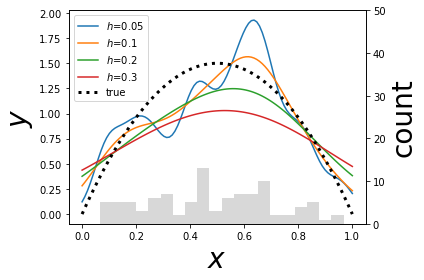

In [9]:
from __future__ import division
from matplotlib.pylab import subplots
fig,ax=subplots()
xi = np.linspace(0,1,100)[:,None]
for i in kdes:
    f=lambda x: np.exp(i.score_samples(x))
    f2 = lambda x: f(x)**2
    _=ax.plot(xi,f(xi),label='$h$='+str(i.bandwidth))

_=ax.set_xlabel('$x$',fontsize=28)
_=ax.set_ylabel('$y$',fontsize=28)
_=ax.plot(xi,rv.pdf(xi),'k:',lw=3,label='true')
_=ax.legend(loc=0)
ax2 = ax.twinx()
_=ax2.hist(d,20,alpha=.3,color='gray')
_=ax2.axis(ymax=50)
_=ax2.set_ylabel('count',fontsize=28)
fig.tight_layout()
fig.savefig('fig-statistics/nonparametric_003.png')

<!-- dom:FIGURE: [fig-statistics/nonparametric_003.png, width=800 frac=0.85]
Each line above is a different kernel density estimator for the given bandwidth
as an approximation to the true density function. A plain histogram is imprinted
on the bottom for reference.  <div id="fig:nonparametric_003"></div> -->
<!--
begin figure -->
<div id="fig:nonparametric_003"></div>

<p>Each line above is a
different kernel density estimator for the given bandwidth as an approximation
to the true density function. A plain histogram is imprinted on the bottom for
reference.</p>
<img src="fig-statistics/nonparametric_003.png" width=800>

<!--
end figure -->


Scikit-learn has many more advanced tools to automate this kind
of
hyper-parameter (i.e., kernel density bandwidth) search. To utilize these
advanced tools, we need to format the current problem slightly differently by
defining the following wrapper class.

In [10]:
class KernelDensityWrapper(KernelDensity):
    def predict(self,x):
        return np.exp(self.score_samples(x))
    def score(self,test):
        f = lambda x: self.predict(x)
        f2 = lambda x: f([[x]])**2
        return -(quad(f2,0,1)[0]-2*np.mean(f(test)))

This is tantamount to reorganizing the above previous code 
into functions that
Scikit-learn requires. Next, we create the
dictionary of parameters we want to
search over (`params`) below
and then start the grid search with the `fit`
function,

In [11]:
from sklearn.model_selection import GridSearchCV
params = {'bandwidth':np.linspace(0.01,0.5,10)}
clf = GridSearchCV(KernelDensityWrapper(), param_grid=params,cv=2)
clf.fit(d)
print (clf.best_params_)

{'bandwidth': 0.17333333333333334}


The grid search iterates over all the elements in the `params`
dictionary and
reports the best bandwidth over that list of parameter values.
The `cv` keyword
argument above specifies that we want to split the data
into two equally-sized
sets for training and testing. We can
also examine the values of the objective
function for each point
on the grid as follow,

In [12]:
clf.cv_results_['mean_test_score']

array([0.60758058, 1.06324954, 1.11858734, 1.13187097, 1.12006532,
       1.09186225, 1.05391076, 1.01126161, 0.96717292, 0.92354959])

Keep in mind that the grid search examines multiple folds for cross
validation
to compute the above means and standard deviations. Note that there
is also a
`RandomizedSearchCV` in case you would rather specify a distribution
of
parameters instead of a list. This is particularly useful for searching very
large parameter spaces where an exhaustive grid search would be too
computationally expensive. Although kernel density estimators are easy to
understand and have many attractive analytical properties, they become
practically prohibitive for large, high-dimensional data sets.

## Nonparametric
Regression Estimators

Beyond estimating the underlying probability density, we
can use nonparametric
methods to compute estimators of the underlying function
that is generating the
data.  Nonparametric regression estimators of the
following form are known as
linear smoothers,

$$
\hat{y}(x) =  \sum_{i=1}^n \ell_i(x) y_i
$$

 To understand the performance of these smoothers,
we can define the risk as the
following,

$$
R(\hat{y},y) = \mathbb{E}\left( \frac{1}{n} \sum_{i=1}^n
(\hat{y}(x_i)-y(x_i))^2 \right)
$$

 and find the best $\hat{y}$ that minimizes this. The problem with
this metric
is that we do not know $y(x)$, which is why we are trying to
approximate it with
$\hat{y}(x)$. We could construct an estimation by using the
data at hand as in
the following,

$$
\hat{R}(\hat{y},y) =\frac{1}{n} \sum_{i=1}^n (\hat{y}(x_i)-Y_i)^2
$$

 where we have substituted the data $Y_i$ for the unknown function
value,
$y(x_i)$. The problem with this approach is that we are using the data
to
estimate the function and then using the same data to evaluate the risk of
doing
so. This kind of double-dipping leads to overly optimistic estimators.
One way
out of this conundrum is to use leave-one-out cross validation, wherein
the
$\hat{y}$ function is estimated using all but one of the data pairs,
$(X_i,Y_i)$. Then, this missing data element is used to estimate the above
risk.
Notationally, this is written as the following,

$$
\hat{R}(\hat{y},y) =\frac{1}{n} \sum_{i=1}^n (\hat{y}_{(-i)}(x_i)-Y_i)^2
$$

 where $\hat{y}_{(-i)}$ denotes computing the estimator without using
the
$i^{th}$ data pair. Unfortunately, for anything other than relatively small
data
sets, it quickly becomes computationally prohibitive to use leave-one-out
cross
validation in practice. We'll get back to this issue shortly, but let's
consider
a concrete example of such a nonparametric smoother.

## Nearest Neighbors
Regression
<div id="ch:stats:sec:nnreg"></div>

The simplest possible
nonparametric regression method is the $k$-nearest
neighbors regression. This is
easier to explain in words than to write out in
math. Given an input $x$, find
the closest one of the $k$ clusters that
contains it and then return the mean of
the data values in that cluster. As a
univariate example, let's consider the
following *chirp* waveform,

$$
y(x)=\cos\left(2\pi\left(f_o x + \frac{BW x^2}{2\tau}\right)\right)
$$

 This waveform is important in high-resolution radar applications.
The $f_o$ is
the start frequency and $BW/\tau$ is the frequency slope of the
signal. For our
example, the fact that it is nonuniform over its domain is
important. We can
easily create some data by sampling the
chirp as in the following,

In [13]:
from numpy import cos, pi
xi = np.linspace(0,1,100)[:,None]
xin = np.linspace(0,1,12)[:,None]
f0 = 1 # init frequency
BW = 5
y = np.cos(2*pi*(f0*xin+(BW/2.0)*xin**2))

We can use this data to construct a simple nearest neighbor
estimator using
Scikit-learn,

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(2) 
knr.fit(xin,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

**Programming Tip.**

Scikit-learn has a fantastically consistent interface. The
`fit` function above
fits the model parameters to the data. The corresponding
`predict` function
returns the output of the model given an arbitrary input. We
will spend a lot
more time on Scikit-learn in the machine learning chapter. The
`[:,None]` part
at the end is just injecting a column dimension into the array
in order to
satisfy the dimensional requirements of Scikit-learn.

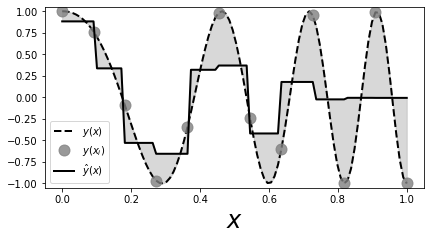

In [15]:
from matplotlib.pylab import subplots
fig,ax=subplots()
yi = cos(2*pi*(f0*xi+(BW/2.0)*xi**2))
_=ax.plot(xi,yi,'k--',lw=2,label=r'$y(x)$')
_=ax.plot(xin,y,'ko',lw=2,ms=11,color='gray',alpha=.8,label='$y(x_i)$')
_=ax.fill_between(xi.flat,yi.flat,knr.predict(xi).flat,color='gray',alpha=.3)
_=ax.plot(xi,knr.predict(xi),'k-',lw=2,label='$\hat{y}(x)$')
_=ax.set_aspect(1/4.)
_=ax.axis(ymax=1.05,ymin=-1.05)
_=ax.set_xlabel(r'$x$',fontsize=24)
_=ax.legend(loc=0)
fig.set_tight_layout(True)
fig.savefig('fig-statistics/nonparametric_004.png')

<!-- dom:FIGURE: [fig-statistics/nonparametric_004.png, width=800 frac=0.85] The
dotted line shows the chirp signal and the solid line shows the nearest neighbor
estimate. The gray circles are the sample points that we used to fit the nearest
neighbor estimator. The shaded area shows the gaps between the estimator and the
unsampled chirp.  <div id="fig:nonparametric_004"></div> -->
<!-- begin figure
-->
<div id="fig:nonparametric_004"></div>

<p>The dotted line shows the chirp
signal and the solid line shows the nearest neighbor estimate. The gray circles
are the sample points that we used to fit the nearest neighbor estimator. The
shaded area shows the gaps between the estimator and the unsampled chirp.</p>
<img src="fig-statistics/nonparametric_004.png" width=800>

<!-- end figure -->
[Figure](#fig:nonparametric_004) shows the sampled signal (gray
circles) against
the values generated by the nearest neighbor estimator (solid
line). The dotted
line is the full unsampled chirp signal, which increases in
frequency with $x$.
This is important for our example because it adds a
non-stationary aspect to
this problem in that the function gets progressively
wigglier with increasing
$x$.  The area between the estimated curve and the
signal is shaded in gray.
Because the nearest neighbor estimator uses only two
nearest neighbors, for each
new $x$, it finds the two adjacent $X_i$ that
bracket the $x$ in the training
data and then averages the corresponding $Y_i$
values to compute the estimated
value. That is, if you take every adjacent pair
of sequential gray circles in
the Figure, you find that the horizontal solid line 
splits the pair on the
vertical axis. We can adjust the number of
nearest neighbors  by changing the
constructor,

In [16]:
knr=KNeighborsRegressor(3) 
knr.fit(xin,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

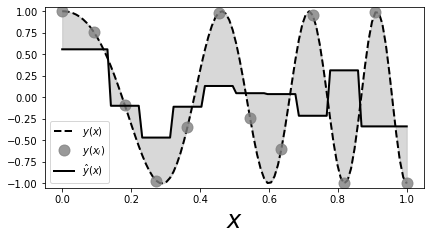

In [17]:
fig,ax=subplots()
_=ax.plot(xi,yi,'k--',lw=2,label=r'$y(x)$')
_=ax.plot(xin,y,'ko',lw=2,ms=11,color='gray',alpha=.8,label='$y(x_i)$')
_=ax.fill_between(xi.flat,yi.flat,knr.predict(xi).flat,color='gray',alpha=.3)
_=ax.plot(xi,knr.predict(xi),'k-',lw=2,label='$\hat{y}(x)$')
_=ax.set_aspect(1/4.)
_=ax.axis(ymax=1.05,ymin=-1.05)
_=ax.set_xlabel(r'$x$',fontsize=24)
_=ax.legend(loc=0)
fig.set_tight_layout(True)
fig.savefig('fig-statistics/nonparametric_005.png')

which produces the following corresponding [Figure](#fig:nonparametric_005).
<!-- dom:FIGURE: [fig-statistics/nonparametric_005.png, width=800 frac=0.85]
This is the same as [Figure](#fig:nonparametric_004) except that here there are
three nearest neighbors used to build the estimator.  <div
id="fig:nonparametric_005"></div> -->
<!-- begin figure -->
<div
id="fig:nonparametric_005"></div>

<p>This is the same as
[Figure](#fig:nonparametric_004) except that here there are three nearest
neighbors used to build the estimator.</p>
<img src="fig-
statistics/nonparametric_005.png" width=800>

<!-- end figure -->


For this
example, [Figure](#fig:nonparametric_005) shows that with
more nearest neighbors
the fit performs poorly, especially towards the end of
the signal, where there
is increasing variation, because the chirp is not
uniformly continuous.

Scikit-
learn provides many tools for cross validation. The following code
sets up the
tools for leave-one-out cross validation,

In [18]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()

The `LeaveOneOut` object is an iterable that produces a set of
disjoint indices
of the data --- one for fitting the model (training set) and
one for evaluating
the model (testing set).  The next block loops over the
disjoint sets of
training and test indicies iterates provided by the `loo`
variable to evaluate
the estimated risk, which is accumulated in the `out`
list.

In [19]:
out=[]
for train_index, test_index in loo.split(xin):
    _=knr.fit(xin[train_index],y[train_index])
    out.append((knr.predict(xi[test_index])-y[test_index])**2)

print( 'Leave-one-out Estimated Risk: ',np.mean(out),)

Leave-one-out Estimated Risk:  1.0351713662681845


The last line in the code above reports leave-one-out's estimated
risk.
Linear smoothers of this type can be rewritten in using the following matrix,

$$
\mathscr{S} = \left[ \ell_i(x_j) \right]_{i,j}
$$

 so that

$$
\hat{\mathbf{y}} = \mathscr{S} \mathbf{y}
$$

   where $\mathbf{y}=\left[Y_1,Y_2,\ldots,Y_n\right]\in \mathbb{R}^n$
and $\hat{
\mathbf{y}
}=\left[\hat{y}(x_1),\hat{y}(x_2),\ldots,\hat{y}(x_n)\right]\in
\mathbb{R}^n$.
This leads to a quick way to approximate leave-one-out cross
validation as the
following,

$$
\hat{R}=\frac{1}{n}\sum_{i=1}^n\left(\frac{y_i-\hat{y}(x_i)}{1-\mathscr{S}_{i,i}}\right)^2
$$

 However, this does not reproduce the approach in the code above
because it
assumes that each $\hat{y}_{(-i)}(x_i)$ is consuming one fewer
nearest neighbor
than $\hat{y}(x)$.

We can get this $\mathscr{S}$ matrix from the `knr` object
as in the following,

In [20]:
_= knr.fit(xin,y) # fit on all data
S=(knr.kneighbors_graph(xin)).todense()/float(knr.n_neighbors)

The `todense` part reformats the sparse matrix that is
returned into a regular
Numpy `matrix`. The following shows a subsection
of this $\mathcal{S}$ matrix,

In [21]:
print(S[:5,:5])

[[0.33333333 0.33333333 0.33333333 0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         0.33333333 0.33333333]]


The sub-blocks show the windows of the the `y` data that are being
processed by
the nearest neighbor estimator. For example,

In [22]:
print(np.hstack([knr.predict(xin[:5]),(S*y)[:5]]))#columns match

[[ 0.55781314  0.55781314]
 [ 0.55781314  0.55781314]
 [-0.09768138 -0.09768138]
 [-0.46686876 -0.46686876]
 [-0.10877633 -0.10877633]]


Or, more concisely checking all entries for approximate equality,

In [23]:
np.allclose(knr.predict(xin),S*y)

True

which shows that the results from the nearest neighbor
object and the matrix
multiply match.

**Programming Tip.**

Note that because we formatted the
returned $\mathscr{S}$ as a Numpy matrix, we
automatically get the matrix
multiplication instead of default element-wise
multiplication in the `S*y` term.
## Kernel Regression

For estimating the probability density, we started with
the histogram and moved
to the more general kernel density estimate. Likewise,
we can also extend
regression from nearest neighbors to kernel-based regression
using the
*Nadaraya-Watson* kernel regression estimator.  Given a bandwidth
$h>0$, the
kernel regression estimator is defined as the following,

$$
\hat{y}(x)=\frac{\sum_{i=1}^n K\left(\frac{x-x_i}{h}\right) Y_i}{\sum_{i=1}^n
K \left( \frac{x-x_i}{h} \right)}
$$

 Unfortunately, Scikit-learn does not implement this
regression estimator;
however, Jan Hendrik Metzen  makes a compatible
version available on
`github.com`.

In [24]:
import sys
sys.path.append('../src-statistics')
xin = np.linspace(0,1,20)[:,None]
y = cos(2*pi*(f0*xin+(BW/2.0)*xin**2)).flatten()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [25]:
from kernel_regression import KernelRegression

This code makes it possible to internally optimize over the bandwidth
parameter
using leave-one-out cross validation by specifying a grid of
potential bandwidth
values (`gamma`), as in the following,

In [26]:
kr = KernelRegression(gamma=np.linspace(6e3,7e3,500))
kr.fit(xin,y)

KernelRegression(gamma=6000.0, kernel='rbf')

[Figure](#fig:nonparametric_006) shows the kernel estimator (heavy
black line)
using the Gaussian kernel compared to the nearest neighbor
estimator (solid
light black line). As before, the data points are shown as
circles.
[Figure](#fig:nonparametric_006) shows that the kernel estimator can
pick out
the sharp peaks that are missed by the nearest neighbor estimator.  

<!--
dom:FIGURE: [fig-statistics/nonparametric_006.png, width=800 frac=0.85] The
heavy black line is the Gaussian kernel estimator. The light black line is the
nearest neighbor estimator. The data points are shown as gray circles. Note that
unlike the nearest neighbor estimator, the Gaussian kernel estimator is able to
pick out the sharp peaks in the training data.  <div
id="fig:nonparametric_006"></div> -->
<!-- begin figure -->
<div
id="fig:nonparametric_006"></div>

<p>The heavy black line is the Gaussian
kernel estimator. The light black line is the nearest neighbor estimator. The
data points are shown as gray circles. Note that unlike the nearest neighbor
estimator, the Gaussian kernel estimator is able to pick out the sharp peaks in
the training data.</p>
<img src="fig-statistics/nonparametric_006.png"
width=800>

<!-- end figure -->


Thus, the difference between nearest neighbor
and kernel estimation is that the
latter provides a smooth moving averaging of
points whereas the former provides
a discontinuous averaging. Note that kernel
estimates suffer near the
boundaries where there is mismatch between the edges
and the kernel
function. This problem gets worse in higher dimensions because
the data
naturally drift towards the boundaries (this is a consequence of the
*curse of
dimensionality*). Indeed, it is not possible to simultaneously
maintain local
accuracy (i.e., low bias) and a generous neighborhood (i.e., low
variance). One
way to address this problem is to create a local polynomial
regression using
the kernel function as a window to localize a region of
interest. For example,

$$
\hat{y}(x)=\sum_{i=1}^n K\left(\frac{x-x_i}{h}\right) (Y_i-\alpha - \beta
x_i)^2
$$

 and now we have to optimize over the two linear parameters $\alpha$
and
$\beta$. This method is known as *local linear regression*
[[loader2006local]](#loader2006local),
[[hastie2013elements]](#hastie2013elements). Naturally, this can be
extended to
higher-order polynomials. Note that these methods are not yet
implemented in
Scikit-learn.

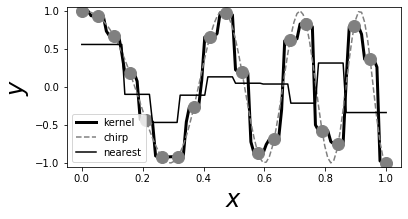

In [27]:
fig,ax=subplots()
#fig.set_size_inches((12,4))
_=ax.plot(xi,kr.predict(xi),'k-',label='kernel',lw=3)
_=ax.plot(xin,y,'o',lw=3,color='gray',ms=12)
_=ax.plot(xi,yi,'--',color='gray',label='chirp')
_=ax.plot(xi,knr.predict(xi),'k-',label='nearest')
_=ax.axis(ymax=1.1,ymin=-1.1)
_=ax.set_aspect(1/4.)
_=ax.axis(ymax=1.05,ymin=-1.05)
_=ax.set_xlabel(r'$x$',fontsize=24)
_=ax.set_ylabel(r'$y$',fontsize=24)
_=ax.legend(loc=0)
fig.savefig('fig-statistics/nonparametric_006.png')

## Curse of Dimensionality

<!-- # #ifdef SINGLE -->
<!-- TITLE:  Curse of Dimensionality -->
<!-- AUTHOR:
Jose Unpingco -->
<!-- DATE: today -->
<!-- # #endif -->

The so-called curse of
dimensionality occurs as we move into higher and higher
dimensions. The term was
coined by Bellman in 1961 while he was studying
adaptive control processes.
Nowadays, the term is vaguely refers to anything
that becomes more complicated
as the number of dimensions increases
substantially. Nevertheless, the concept
is useful for recognizing
and characterizing the practical difficulties of high-
dimensional analysis and
estimation.

Consider the volume of an $d$-dimensional
sphere of radius $r$,

$$
V_s(d,r)=\frac{\pi ^{d/2} r^d}{\Gamma \left(\frac{d}{2}+1\right)}
$$

 Further, consider the sphere $V_s(d,1/2)$ enclosed by an $d$
dimensional unit
cube.  The volume of the cube is always equal to one, but
$\lim_{d\rightarrow\infty} V_s(d,1/2) = 0$. What does this mean? It means that
the volume of the cube is pushed away from its center, where the embedded
hypersphere lives.  Specifically, the distance from the center of the cube to
its vertices in $d$ dimensions is $\sqrt{d}/2$, whereas the distance from the
center of the inscribing sphere is $1/2$. This diagonal distance goes to
infinity as $d$ does. For a fixed $d$, the tiny spherical region at the center
of the cube has many long spines attached to it, like a hyper-dimensional sea
urchin or porcupine.

Another way to think about this is to consider the
$\epsilon>0$ thick peel of the
hypersphere,

$$
\mathcal{P}_{\epsilon} =V_s(d,r) - V_s(d,r-\epsilon)
$$

 Then, we consider the following limit,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\lim_{d\rightarrow\infty}\mathcal{P}_{\epsilon}
=\lim_{d\rightarrow\infty} V_s(d,r)\left(1 -
\frac{V_s(d,r-\epsilon)}{V_s(d,r)}\right)  
\label{_auto1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} \
=\lim_{d\rightarrow\infty} V_s(d,r)\left(1 -\lim_{d\rightarrow\infty}
\left(\frac{r-\epsilon}{r}\right)^d\right)  
\label{_auto2} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation} \
=\lim_{d\rightarrow\infty} V_s(d,r)
\label{_auto3} \tag{3}
\end{equation}
$$

 So, in the limit, the volume of the $\epsilon$-thick peel 
consumes the volume
of the hypersphere.

What are the consequences of this? For methods that rely on
nearest
neighbors, exploiting locality to lower bias becomes intractable. For
example, suppose we have an $d$ dimensional space and a point near the
origin we
want to localize around. To estimate behavior around this
point, we need to
average the unknown function about this point, but
in a high-dimensional space,
the chances of finding neighbors to
average are slim. Looked at from the
opposing point of view, suppose
we have a binary variable, as in the coin-
flipping problem. If we have
1000 trials, then, based on our earlier work, we
can be confident
about estimating the probability of heads.  Now, suppose we
have 10
binary variables.  Now we have $2^{ 10 }=1024$ vertices to estimate.
If
we had the same 1000 points, then at least 24 vertices would not
get any data.
To keep the same resolution, we would need 1000 samples
at each vertex for a
grand total of $1000\times 1024 \approx 10^6$
data points. So, for a ten fold
increase in the number of variables,
we now have about 1000 more data points to
collect to maintain the
same statistical resolution. This is the curse of
dimensionality.

Perhaps some code will clarify this. The following code
generates samples in
two dimensions that are plotted as points in
[Figure](#fig:curse_of_dimensionality_001) with the inscribed circle in two
dimensions. Note that for $d=2$ dimensions,  most of the points are contained
in
the circle.

In [28]:
import numpy as np
v=np.random.rand(1000,2)-1/2.

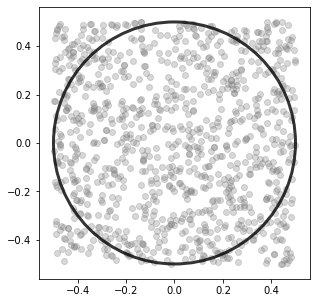

In [29]:
from matplotlib.patches import Circle
from matplotlib.pylab import subplots
fig,ax=subplots()
fig.set_size_inches((5,5))
_=ax.set_aspect(1)
_=ax.scatter(v[:,0],v[:,1],color='gray',alpha=.3)
_=ax.add_patch(Circle((0,0),0.5,alpha=.8,lw=3.,fill=False))
fig.savefig('fig-statistics/curse_of_dimensionality_001.pdf')

<!-- dom:FIGURE: [fig-statistics/curse_of_dimensionality_001.pdf, width=800
frac=0.65] Two dimensional scatter of points randomly and independently
uniformly distributed in the unit square. Note that most of the points are
contained in the circle. Counter to intuition, this does not persist as the
number of dimensions increases. <div id="fig:curse_of_dimensionality_001"></div>
-->
<!-- begin figure -->
<div id="fig:curse_of_dimensionality_001"></div>
<p>Two dimensional scatter of points randomly and independently uniformly
distributed in the unit square. Note that most of the points are contained in
the circle. Counter to intuition, this does not persist as the number of
dimensions increases.</p>
<img src="fig-statistics/curse_of_dimensionality_001.pdf" width=800>

<!-- end figure -->
The next code block describes the core computation in
[Figure](#fig:curse_of_dimensionality_002). For each of the dimensions, we
create a set of uniformly distributed random variates along each dimension
and
then compute how close each $d$ dimensional vector is to the origin.
Those that
measure one half are those contained in the hypersphere. The
histogram of each
measurment is shown in the corresponding panel in the
[Figure](#fig:curse_of_dimensionality_002). The dark vertical line shows the
threshold value. Values to the left
of this indicate the population that are
contained in the hypersphere. Thus,
[Figure](#fig:curse_of_dimensionality_002)
shows that as $d$ increases,
fewer points are contained in the inscribed
hypersphere. The following
code paraphrases  the content of
[Figure](#fig:curse_of_dimensionality_002).

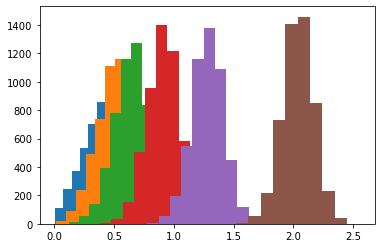

In [30]:
fig,ax=subplots()
for d in [2,3,5,10,20,50]:
    v=np.random.rand(5000,d)-1/2.
    ax.hist([np.linalg.norm(i) for i in v])

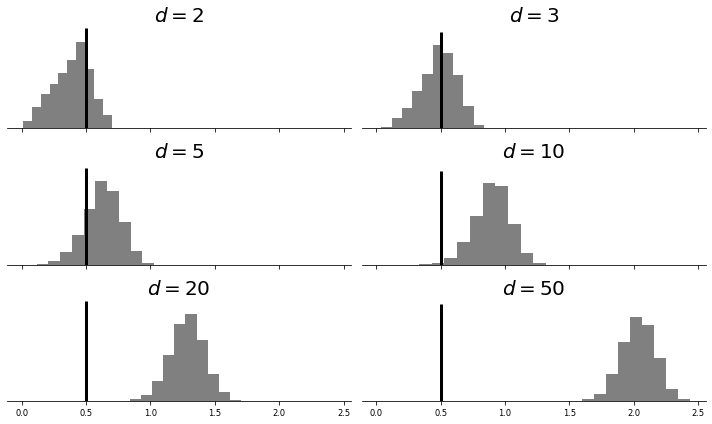

In [31]:
siz = [ 2,3,5,10,20,50 ]
fig,axs=subplots(3,2,sharex=True)
fig.set_size_inches((10,6))
for ax,k in zip(axs.flatten(),siz):
    v=np.random.rand(5000,k)-1/2.
    _=ax.hist([np.linalg.norm(i) for i in v],color='gray',density=True);
    _=ax.vlines(0.5,0,ax.axis()[-1]*1.1,lw=3)
    _=ax.set_title('$d=%d$'%k,fontsize=20)
    _=ax.tick_params(labelsize='small',top=False,right=False)
    _=ax.spines['top'].set_visible(False)
    _=ax.spines['right'].set_visible(False)
    _=ax.spines['left'].set_visible(False)
    _=ax.yaxis.set_visible(False)
    _=ax.axis(ymax=3.5)

fig.set_tight_layout(True)
fig.savefig('fig-statistics/curse_of_dimensionality_002.pdf')

<!-- dom:FIGURE: [fig-statistics/curse_of_dimensionality_002.pdf, width=800
frac=0.95] Each panel shows the histogram of lengths of uniformly distributed
$d$ dimensional random vectors. The population to the left of the dark vertical
line are those that are contained in the inscribed hypersphere. This shows that
fewer points are contained in the hypersphere with increasing dimension. <div
id="fig:curse_of_dimensionality_002"></div> -->
<!-- begin figure -->
<div
id="fig:curse_of_dimensionality_002"></div>

<p>Each panel shows the histogram
of lengths of uniformly distributed $d$ dimensional random vectors. The
population to the left of the dark vertical line are those that are contained in
the inscribed hypersphere. This shows that fewer points are contained in the
hypersphere with increasing dimension.</p>
<img src="fig-
statistics/curse_of_dimensionality_002.pdf" width=800>

<!-- end figure -->


##
Nonparametric Tests


Determining whether or not two sets of observations derive
from the same
underlying probability distribution is an important problem. The
most popular
way to do this is with a standard t-test, but that requires
assumptions about
normality that may be hard to justify, which leads to
nonparametric methods can
get at this questions without such assumptions.

Let
$V$ and $W$ be continuous random variables. The variable 
$V$ is *stochastically
larger* than $W$ if,

$$
\mathbb{P}(V\ge x) \ge \mathbb{P}(W\ge x)
$$

 for all $x\in \mathbb{R}$ with strict inequality for at least one
$x$. The term
*stochastically smaller* means the obverse of this. For example,
the black line
density function shown in [Figure](#fig:nonparametric_tests_001) is
stochastically larger than the gray one.

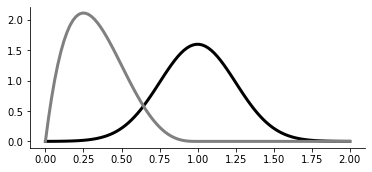

In [32]:
import numpy as np
from scipy import stats
from matplotlib.pylab import subplots

fig,ax=subplots()
xi = np.linspace(0,2,100)
_=ax.plot(xi,stats.norm(1,0.25).pdf(xi),lw=3,color='k')
_=ax.plot(xi,stats.beta(2,4).pdf(xi),lw=3,color='gray')
_=ax.spines['top'].set_visible(0)
_=ax.spines['right'].set_visible(0)
_=ax.tick_params(labelsize='medium',top=False,right=False)
ax.set_aspect(1/2.5)

fig.savefig('fig-statistics/nonparametric_tests_001.png')

<!-- dom:FIGURE: [fig-statistics/nonparametric_tests_001.png, width=800
frac=0.65] The black line density function is stochastically larger than the
gray one. <div id="fig:nonparametric_tests_001"></div> -->
<!-- begin figure -->
<div id="fig:nonparametric_tests_001"></div>

<p>The black line density function
is stochastically larger than the gray one.</p>
<img src="fig-
statistics/nonparametric_tests_001.png" width=800>

<!-- end figure -->


### The Mann-Whitney-Wilcoxon Test

The Mann-Whitney-Wilcoxon Test approaches the
following alternative hypotheses

   * $H_0$ : $F(x) = G(x)$ for all $x$ versus
* $H_a$ : $F(x) \ge G(x)$, $F$ stochastically greater than $G$.

Suppose we have
two data sets $X$ and $Y$ and we want to know if they are drawn
from the same
underlying probability distribution or if one is stochastically
greater than the
other. There are $n_x$ elements in $X$ and $n_y$ elements in
$Y$. If we combine
these two data sets and rank them, then, under the null
hypothesis, any data
element should be as likely as any other to be assigned
any particular rank.
that is, the combined set $Z$,

$$
Z = \lbrace X_1,\ldots,X_{n_x}, Y_1,\ldots,Y_{n_y} \rbrace
$$

 contains $n=n_x+n_y$ elements. Thus, any assignment of $n_y$ ranks
from the
integers $\lbrace 1,\ldots,n \rbrace$  to $\lbrace Y_1,\ldots,Y_{n_y}
\rbrace$
should be equally likely (i.e., $\mathbb{P}={ \binom{n}{n_y} }^{-1}$).
Importantly, this property is independent of the $F$ distribution.

That is, we
can define the $U$ statistic as the following,

$$
U_X =\sum_{i=1}^{n_x}\sum_{j=1}^{n_y}\mathbb{I}(X_i\ge Y_j)
$$

 where $\mathbb{I}(\cdot)$ is the usual indicator function. For an
interpretation, this counts the number of times that elements of $Y$ outrank
elements of $X$.   For example, let us suppose that $X=\lbrace 1,3,4,5,6
\rbrace$ and $Y=\lbrace 2,7,8,10,11 \rbrace$.  We can get a this in one move
using Numpy broadcasting,

In [33]:
import numpy as np
x = np.array([ 1,3,4,5,6 ])
y = np.array([2,7,8,10,11])
U_X = (y <= x[:,None]).sum()
U_Y = (x <= y[:,None]).sum()
print (U_X, U_Y)

4 21


Note that

$$
U_X+U_Y =\sum_{i=1}^{n_x}\sum_{j=1}^{n_y} \mathbb{I}(Y_i\ge
X_j)+\mathbb{I}(X_i\ge Y_j)= n_x n_y
$$

 because $\mathbb{I}(Y_i\ge X_j)+\mathbb{I}(X_i\ge Y_j)=1$.  We 
can verify this
in Python,

In [34]:
print ((U_X+U_Y) == len(x)*len(y))

True


Now that we can compute the $U_X$ statistic, we have to characterize it. Let us
consider $U_X$. If $H_0$ is true, then $X$ and $Y$ are identically distributed
random variables. Thus all $\binom{n_x+n_y}{n_x}$ allocations of the
$X$-variables in the ordered combined sample  are equally likely. Among these,
there are $\binom{n_x+n_y-1}{n_x}$ allocations have a $Y$ variable 
as the
largest observation in the combined sample. For these, omitting this 
largest
observation does not affect $U_X$ because it would not have been
counted anyway.
The other $\binom{n_x+n_y-1}{n_x-1}$ allocations have 
an element of $X$ as the
largest observation. Omitting this observation 
reduces $U_X$ by $n_y$.

With
all that, suppose $N_{n_x,n_y}(u)$ be the number of allocations of 
$X$ and $Y$
elements that result in $U_X=u$. Under $H_0$ situation 
of equally likely
outcomes, we have

$$
p_{n_x, n_y}(u) =
\mathbb{P}(U_X=u)=\frac{N_{n_x,n_y}(u)}{\binom{n_x+n_y}{n_x}}
$$

 From our previous discussion, we have the recursive relationship,

$$
N_{n_x,n_y}(u) = N_{n_x,n_y-1}(u) + N_{n_x-1,n_y}(u-n_y)
$$

 After dividing all of this by $\binom{n_x+n_y}{n_x}$ and using the
$p_{n_x,
n_y}(u)$ notation above, we obtain the following,

$$
p_{n_x, n_y}(u) = \frac{n_y}{n_x+n_y} p_{n_x,n_y-1}(u)+\frac{n_x}{n_x+n_y}
p_{n_x-1,n_y}(u-n_y)
$$

 where $0\le u\le n_x n_y$. To start this recursion, we need the
following
initial conditions,

$$
\begin{eqnarray*}
p_{0,n_y}(u_x=0) & = & 1 \\ 
p_{0,n_y}(u_x>0) & = & 0 \\
p_{n_x,0}(u_x=0) & = & 1 \\ 
p_{n_x,0}(u_x>0) & = & 0 
\end{eqnarray*}
$$

 To see how this works in Python,

In [35]:

def prob(n,m,u):
    if u<0: return 0
    if n==0 or m==0:
        return int(u==0)
    else:
        f = m/float(m+n)
        return (f*prob(n,m-1,u) + 
                (1-f)*prob(n-1,m,u-m))

These are shown in [Figure](#fig:nonparametric_tests_002) and
approach a normal
distribution for large $n_x,n_y$, with the following 
mean and variance,

<!-- Equation labels as ordinary links -->
<div id="eq:ustatmv"></div>

$$
\begin{eqnarray}
\mathbb{E}(U) & = & \frac{n_x n_y}{2} \\
\mathbb{V}(U) & = &
\frac{n_x n_y (n_x+n_y+1)}{12}
\end{eqnarray}
\label{eq:ustatmv} \tag{4}
$$

 The variance becomes more complicated when there are ties.

/home/unpingco/.conda/envs/pypsml2E/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/home/unpingco/.conda/envs/pypsml2E/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/home/unpingco/.conda/envs/pypsml2E/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection inst

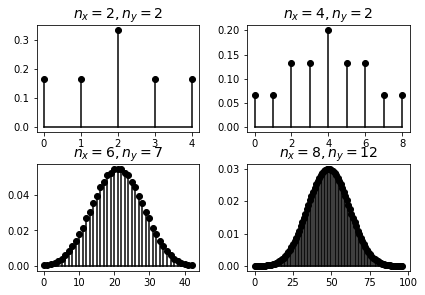

In [36]:
fig,axs=subplots(2,2)
fig.tight_layout()
ax=axs[0,0]
ax.tick_params(axis='both', which='major', labelsize=10)
_=ax.stem([prob(2,2,i) for i in range(2*2+1)],linefmt='k-',markerfmt='ko',basefmt='k-')
_=ax.set_title(r'$n_x=%d,n_y=%d$'%(2,2),fontsize=14)
ax=axs[0,1]
ax.tick_params(axis='both', which='major', labelsize=10)
_=ax.stem([prob(4,2,i) for i in range(4*2+1)],linefmt='k-',markerfmt='ko',basefmt='k-')
_=ax.set_title(r'$n_x=%d,n_y=%d$'%(4,2),fontsize=14)
ax=axs[1,0]
ax.tick_params(axis='both', which='major', labelsize=10)
_=ax.stem([prob(6,7,i) for i in range(6*7+1)],linefmt='k-',markerfmt='ko',basefmt='k-')
_=ax.set_title(r'$n_x=%d,n_y=%d$'%(6,7),fontsize=14)
ax=axs[1,1]
ax.tick_params(axis='both', which='major', labelsize=10)
_=ax.stem([prob(8,12,i) for i in range(8*12+1)],linefmt='k-',markerfmt='ko',basefmt='k-')
_=ax.set_title(r'$n_x=%d,n_y=%d$'%(8,12),fontsize=14)
fig.savefig('fig-statistics/nonparametric_tests_002.png')

<!-- dom:FIGURE: [fig-statistics/nonparametric_tests_002.png, width=800
frac=0.75] The normal approximation to the distribution improves with increasing
$n_x, n_y$. <div id="fig:nonparametric_tests_002"></div> -->
<!-- begin figure
-->
<div id="fig:nonparametric_tests_002"></div>

<p>The normal approximation to
the distribution improves with increasing $n_x, n_y$.</p>
<img src="fig-
statistics/nonparametric_tests_002.png" width=800>

<!-- end figure -->


###
Example

We are trying to determine whether or not one network configuration is
faster
than another. We obtain the following round-trip times for each of the
networks.

In [37]:

X=np.array([ 50.6,31.9,40.5,38.1,39.4,35.1,33.1,36.5,38.7,42.3 ])
Y=np.array([ 28.8,30.1,18.2,38.5,44.2,28.2,32.9,48.8,39.5,30.7 ])

Because there are too few elements to use the
`scipy.stats.mannwhitneyu`
function (which internally uses the normal
approximation to the U-statistic), we
can use our custom function above, but
first we need to compute the $U_X$
statistic using Numpy,

In [38]:
U_X = (Y <= X[:,None]).sum()

For the p-value, we want to compute the probability that the observed 
$U_X$
statistic at least as great as what was observed,

In [39]:
print(sum(prob(10,10,i) for i in range(U_X,101)))

0.08274697438784127


This is close to the usual five percent p-value threshold so it is
possible at
a slightly higher threshold to conclude that the two sets of
samples do *not*
originate from the same underlying distribution. Keep in mind
that the usual
five percent threshold is just a guideline. Ultimately, it is up
to the analyst
to make the call.

### Proving Mean and Variance for U-Statistic

To prove
Equation [4](#eq:ustatmv), we assume there are no ties.
One way to get at the
result $\mathbb{E}(U)= n_x n_y/2$,

$$
\mathbb{E}(U_Y) = \sum_j\sum_i\mathbb{P}(X_i \leq Y_j)
$$

 because $\mathbb{E}(\mathbb{I}(X_i\leq Y_j))=\mathbb{P}(X_i \leq
Y_j)$.
Further, because all the subscripted $X$ and $Y$ variables are drawn
independently from the same distribution, we have

$$
\mathbb{E}(U_Y) = n_x n_y \mathbb{P}(X \leq Y)
$$

 and also,

$$
\mathbb{P}(X \leq Y) + \mathbb{P}(X \ge Y) =1
$$

 because those are the two mutually exclusive conditions.  Because the
$X$
variables and $Y$ variables are drawn from the same distribution, we have
$\mathbb{P}(X \leq Y) = \mathbb{P}(X \ge Y)$, which means $ \mathbb{P}(X \leq
Y)=1/2$ and therefore $\mathbb{E}(U_Y)= n_x n_y /2$.  Another way to get the
same result, is to note that, as we showed earlier,  $U_X+U_Y = n_x n_y $.
Then,
taking the expectation of both sides noting that
$\mathbb{E}(U_X)=\mathbb{E}(U_Y)=\mathbb{E}(U)$, gives

$$
2 \mathbb{E}(U) = n_x n_y
$$

 which gives $\mathbb{E}(U)=n_x n_y /2$. 

Getting the variance 
is trickier. To
start, we compute the following,

$$
\mathbb{E}(U_X U_Y) = \sum_i \sum_j \sum_k \sum_l \mathbb{P}( X_i\ge Y_j
\land X_k \le Y_l )
$$

 Of these terms, we have $\mathbb{P}( Y_j \le X_i\le Y_j)=0$ because these 
are
continuous random variables. Let's consider the terms of the following type,
$\mathbb{P}( Y_i \le X_k \le Y_l)$. To reduce the notational noise, let's
rewrite this as
$\mathbb{P}( Z \le X \le Y)$. Writing this out gives

$$
\mathbb{P}( Z \le X \le Y) = \int_{\mathbb{R}} \int_Z^\infty
(F(Y)-F(Z))f(y)f(z)dy dz
$$

 where $F$ is the cumulative density function and $f$ is the
probability density
function ($dF(x)/dx = f(x)$).  Let's break this up term by
term.  Using some
calculus for the term,

$$
\int_Z^\infty F(Y)f(y)dy = \int_{F(Z)}^1 F dF\ = \frac{1}{2}\left(1-F(Z)
\right)
$$

 Then, integrating out the $Z$ variable from this result, we obtain the
following,

$$
\int_{\mathbb{R}} \frac{1}{2}\left(1-\frac{F(Z)^2}{2}\right) f(z) dz =
\frac{1}{3}
$$

 Next, we  compute,

$$
\begin{eqnarray*}
\int_{\mathbb{R}} F(Z) \int_Z^\infty f(y) dy f(z) dz
&=&\int_{\mathbb{R}} (1-F(Z)) F(Z) f(z) dz \\
&=&\int_{\mathbb{R}} (1-F) F dF =\frac{1}{6}
\end{eqnarray*}
$$

 Finally, assembling the result, we have

$$
\mathbb{P}( Z \le X \le Y) = \frac{1}{3}- \frac{1}{6} = \frac{1}{6}
$$

 Also, terms like $\mathbb{P}(X_k\ge Y_i \land X_m \le Y_i) =
\mathbb{P}(X_m\le
Y_i \le X_k)=1/6$ by the same reasoning. That leaves the
terms like
$\mathbb{P}(X_k\ge Y_i\land X_m\le Y_l)=1/4$ because of mutual
independence  and
$\mathbb{P}(X_k\ge Y_i)=1/2$. Now that we have all the
terms, we have to
assemble the combinatorics to get the final answer.

There are $ n_y (n_y -1)
n_x  + n_x (n_x -1) n_y $ terms of type $\mathbb{P}(
Y_i \le X_k \le Y_l)$.
There are $ n_y (n_y -1) n_x (n_x -1)$ terms like
$\mathbb{P}(X_k\ge Y_i\land
X_m\le Y_l)$. Putting this all together, 
this means that

$$
\mathbb{E}(U_X U_Y) = \frac{n_x n_y(n_x+n_y-2)}{6}+\frac{n_x
n_y(n_x-1)(n_y-1)}{4}
$$

 To assemble the $\mathbb{E}(U^2)$ result, we need to appeal to our earlier
result,

$$
U_X+U_Y = n_x n_y
$$

 Squaring both sides of this and taking the expectation gives,

$$
\mathbb{E}(U_X^2) + 2 \mathbb{E}(U_X U_Y)+\mathbb{E}(U_Y^2) = n_x^2 n_y^2
$$

 Because $\mathbb{E}(U_X^2)=\mathbb{E}(U_X^2)=\mathbb{E}(U)$, we 
can simplify
this as the following,

$$
\begin{eqnarray*}
\mathbb{E}(U^2) &=& \frac{n_x^2 n_y^2 - 2 \mathbb{E}(U_X
U_Y)}{2}\\
\mathbb{E}(U^2) &=& \frac{n_x n_y (1+n_x +n_y +3 n_x n_y )}{12}
\end{eqnarray*}
$$

 Then, since $\mathbb{V}(U) = \mathbb{E}(U^2)- \mathbb{E}(U)^2$, we
finally have

$$
\mathbb{V}(U) = \frac{n_x n_y (1+ n_x +n_y )}{12}
$$

<!-- TODO: Additive models, "" -->
<!-- TODO: Local Regression Methods, p. 32
-->
<!-- TODO: Spline Methods, p. 32 -->
<!-- TODO: Rank-sum test
Mathematica_Laboratories_for_Mathematical_Statistics_Baglivo.txt -->
<!-- TODO:
Rank-sum test Mathematica_Laboratories_for_Mat.. 11.2 Paired sample analysis -->